In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import random
import os

# Set random seeds for getting same output accuracy at each run
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)
os.environ['PYTHONHASHSEED'] = '42'

In [3]:
# Importing dataset
dataset=pd.read_csv('zakat_eligibility_dataset (2).csv')
dataset.head()

,Gold (grams),Monthly Income (PKR),Monthly Expenses (PKR),Marital Status,Employment Type,Region,Income (USD),Assets (USD),Liabilities (USD),Dependents,Net Worth (USD),Zakat Eligibility
0,115,242827,14511,Divorced,Salaried,Urban,4778,337576,37930,3,299646,0
1,124,251506,138501,Single,Business,Rural,5752,499822,19857,1,479965,0
2,154,109603,272333,Divorced,Business,Rural,2205,63704,29980,8,33724,0
3,46,109230,19821,Divorced,Unemployed,Urban,5850,328562,14018,5,314544,0
4,46,482888,315176,Single,Unemployed,Rural,7565,216309,225995,3,-9686,1


In [4]:
# Dividing the dataset into X and y
X=dataset.drop("Zakat Eligibility",axis=1)
y=dataset['Zakat Eligibility']


In [5]:
# Dividing the X into numerical and categorical columns
numerical_columns=[]
categorical_columns=[]
for each in X.columns:
    if X[each].dtype=='object':
        categorical_columns.append(each)
    else:
        numerical_columns.append(each)


In [6]:
# Encoding the categorical columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X['Employment Type']=le.fit_transform(X['Employment Type'])
X['Marital Status']=le.fit_transform(X['Marital Status'])
X['Region']=le.fit_transform(X['Region'])

In [7]:
# Scaling the numerical columns
from sklearn.preprocessing import StandardScaler
se=StandardScaler()
for each in numerical_columns:
    if each=='Dependents':
        pass
    else:
        X[each]=se.fit_transform(X[[each]])
        

In [8]:
# Searching for missing values
X.isnull().sum()

Gold (grams)              0
Monthly Income (PKR)      0
Monthly Expenses (PKR)    0
Marital Status            0
Employment Type           0
Region                    0
Income (USD)              0
Assets (USD)              0
Liabilities (USD)         0
Dependents                0
Net Worth (USD)           0
dtype: int64

In [9]:
X.head()

,Gold (grams),Monthly Income (PKR),Monthly Expenses (PKR),Marital Status,Employment Type,Region,Income (USD),Assets (USD),Liabilities (USD),Dependents,Net Worth (USD)
0,0.268457,-0.067554,-1.655021,0,2,1,-0.119162,0.602037,-1.290511,3,1.168135
1,0.424408,-0.006849,-0.563742,2,0,0,0.222996,1.718291,-1.499505,1,2.226058
2,0.944247,-0.999382,0.614159,0,0,0,-1.023033,-1.282204,-1.382444,8,-0.392016
3,-0.927172,-1.001991,-1.608286,0,3,1,0.257422,0.540021,-1.567026,5,1.255541
4,-0.927172,1.611541,0.991235,2,3,0,0.859887,-0.232280,0.884241,3,-0.646701


In [10]:
# Importing Neural Networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import ReLU,LeakyReLU

In [11]:
# Dividing the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)


In [12]:
# Initializing the model
model=Sequential()


In [13]:
# Adding the input layer
model.add(Dense(units=11, activation='relu'))

In [14]:
# Adding the first hidden layer
model.add(Dense(units=10, activation='relu'))
model.add(Dropout(0.2))

In [15]:
# Adding the second hidden layer
model.add(Dense(units=10, activation='relu'))
model.add(Dropout(0.2))

In [16]:
# Adding the third hidden layer
model.add(Dense(units=10, activation='elu'))
model.add(Dropout(0.2))

In [17]:
# Adding the output layer
model.add(Dense(units=1,activation='sigmoid'))
model.add(Dropout(0.2))

In [18]:
# Compiling the model
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])


In [19]:
# Making the code of early stopping
import tensorflow
early_stopping=tensorflow.keras.callbacks.EarlyStopping(monitor='accuracy',start_from_epoch=0)

In [21]:
# Training the model
model_history=model.fit(X_train,y_train,validation_split=0.2,batch_size=100,epochs=20,callbacks=early_stopping)

Epoch 1/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8918 - loss: 1.1349 - val_accuracy: 0.9644 - val_loss: 0.1381
Epoch 2/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8907 - loss: 1.1172 - val_accuracy: 0.9694 - val_loss: 0.1243


In [22]:
# List all data, parameters we have focused on 
model_history.history.keys()


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

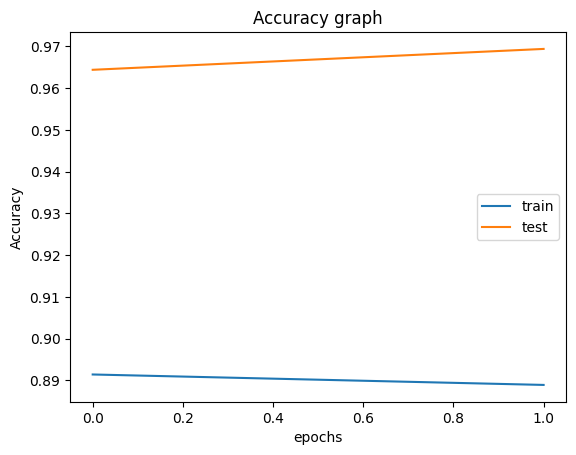

In [27]:
# Drawing the graph of accuracy
import matplotlib.pyplot as plt
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title("Accuracy graph")
plt.ylabel('Accuracy')
plt.xlabel("epochs")
plt.legend(['train','test'])
plt.show()

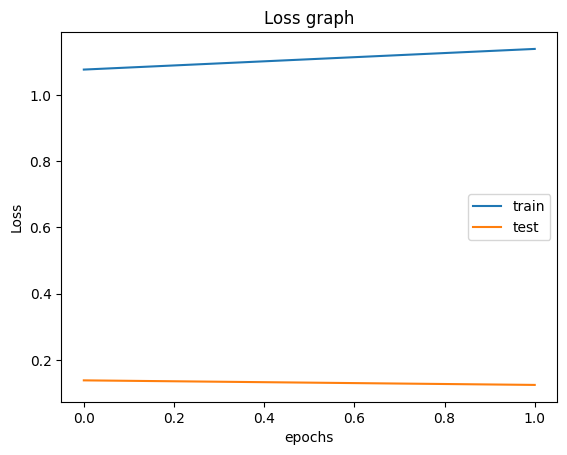

In [31]:
# Plotting the graph of loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title("Loss graph")
plt.ylabel("Loss")
plt.xlabel("epochs")
plt.legend(["train",'test'])
plt.show()

We have acheived accuracy of 89.07% and validation accuracy of 96.94
testing accuracy is 96.85 %


In [36]:
# Making the predictions on testing data
y_pred=model.predict(X_test)
y_pred=(y_pred>0.5)

# Getting the test accuracy
from sklearn.metrics import accuracy_score
test_accuracy=accuracy_score(y_test,y_pred)
print(test_accuracy)

#Making predictions on training data
y_pred_train=model.predict(X_train)
y_pred_train=(y_pred_train>0.5)


# Getting the training accuracy
train_accuracy=accuracy_score(y_train,y_pred_train)
train_accuracy

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
0.9685
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


0.9705

In [37]:
# Making confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1359,   17],
       [  46,  578]], dtype=int64)

In [38]:
# Getting the weights assigned to inputs
weights=model.get_weights()
weights

[array([[ 0.37489578,  0.1506032 , -0.10018731,  0.38810432, -0.327954  ,
          0.15432064,  0.41679764, -0.40919152,  0.09968279,  0.09180024,
         -0.27995548],
        [-0.05990725,  0.3533642 ,  0.05919226,  0.0690405 ,  0.17214526,
         -0.4329315 , -0.34802434, -0.03974565, -0.11186779, -0.54464126,
          0.2911481 ],
        [ 0.42732868, -0.28285253,  0.28562373, -0.23842156, -0.03120699,
          0.05671127,  0.02546578, -0.3592226 , -0.05178558,  0.4690807 ,
         -0.32552704],
        [-0.08488436, -0.06206618, -0.42006272,  0.18255031, -0.4364386 ,
          0.11251906,  0.21301836, -0.430855  ,  0.07303423, -0.16740018,
         -0.24386694],
        [ 0.4430859 , -0.12535852,  0.06573536, -0.03210802, -0.47824186,
          0.16867353,  0.09681054, -0.01987852, -0.18545716, -0.46764746,
          0.18477646],
        [ 0.34986255,  0.01573534, -0.1938771 , -0.40617907, -0.5793135 ,
          0.17420687,  0.4255697 , -0.03384852,  0.20679659, -0.2039799

In [ ]:
# Saving the model
from tensorflow.keras.models import load_model
model.save("Zakat eligibility predictor.h5")